In [1]:
import tensorflow as tf
from tensorflow import keras
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

from PIL import Image
from pylab import *
import cv2
from scipy.ndimage import  filters

In [4]:
train_dir = '/Users/nick/Downloads/chess_data/train'
val_dir = '/Users/nick/Downloads/chess_data/val'
test_dir = '/Users/nick/Downloads/chess_data/test'
test_image_dir = '/Users/nick/Downloads/chess_data/keys'
#классы
black_pawn = 'black_pawn'
empty = 'empty'
black_bishop = 'black_bishop'
test_images = 'test_images'
img_width, img_height = 720, 720
input_shape = (img_width, img_height, 3)
epochs = 3
batch_size = 25

# test_data_portion = 0.15
# val_data_portion = 0.15
# nb_images = 60

nb_train_samples = 137
nb_validation_samples = 19
nb_test_samples = 31

sigma = 0.45

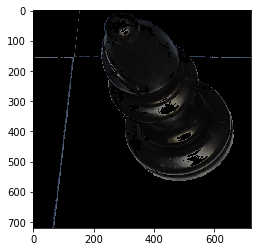

In [6]:
im_test = cv2.imread("/Users/nick/Downloads/chess_data/keys/test_image.jpg")

im_test = cv2.resize(im_test, (720, 720))
hsv = cv2.cvtColor(im_test, cv2.COLOR_BGR2HSV)

lower_black = np.array([0,0,0])
upper_black = np.array([128,128,128])

mask = cv2.inRange(hsv, lower_black, upper_black)
im_test = cv2.bitwise_and(im_test,im_test, mask= mask)
plt.imshow(im_test, cmap = plt.cm.binary)
plt.show()

cv2.imwrite("/Users/nick/Downloads/chess_data/keys/test_image.jpg", im_test)

im_test.shape
im_test = np.expand_dims(im_test, axis = 0)

In [7]:
# test_image = cv2.imread('/Users/nick/Downloads/chess_data/current_test/test_image.jpg', 3)
# cv2.resize(test_image, (720, 720))

In [8]:
# black_pawns = 'black_pawns'
# empty = 'empty'
# start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
# start_test_data_idx = int(nb_images * (1 - test_data_portion))
# print(start_test_data_idx, start_val_data_idx)# def copy_images(start_index, end_index, source_dir, dest_dir, chess_class):
#     i = 0
#     for fn in os.listdir(source_dir):
#         if fn == '.DS_Store':
#             continue
#         if i < start_index:
#             continue
#         if i >= end_index:
#             break
#         shutil.copy2(source_dir, os.path.join(dest_dir, chess_class))
#         i += 1
# copy_images(0, start_val_data_idx, data_dir, val_data, black_pawns)

In [7]:
def process_images(folder_name, class_name):
    for fn in os.listdir(folder_name + '/' + class_name):
        if fn == '.DS_Store':
            continue
        #im = np.array(Image.open(os.path.join(folder_name + '/' + class_name + '/' + fn)).convert('L'))
        im = cv2.imread(os.path.join(folder_name + '/' + class_name + '/' + fn))
        im = cv2.resize(im, (720, 720))
#         imx = np.zeros(im.shape)
#         filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

#         imy = np.zeros(im.shape)
#         filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy)

#         magn = np.sqrt(imx**2 + imy**2)
#         magn = np.uint8(magn)

        
        hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

        lower_black = np.array([0,0,0])
        upper_black = np.array([128,128,128])

        mask = cv2.inRange(hsv, lower_black, upper_black)
        res = cv2.bitwise_and(im,im, mask= mask)
        plt.imshow(mask, cmap = plt.cm.binary)
        plt.show()

        cv2.imwrite(os.path.join(os.path.join(folder_name + '/' + class_name + '/' + fn)), res)

#         plt.figure(figsize=(10,10))
#         plt.xticks([])
#         plt.yticks([])
#         plt.imshow(magn, cmap=plt.cm.binary)
#         plt.show()

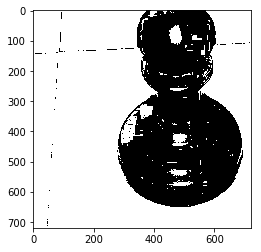

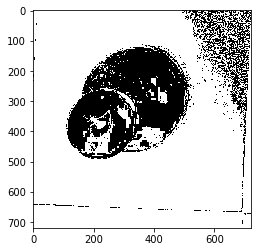

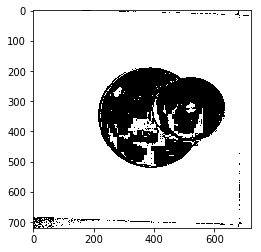

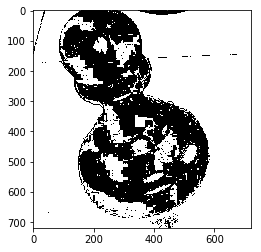

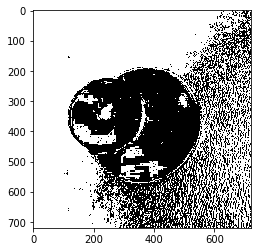

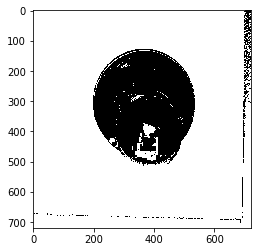

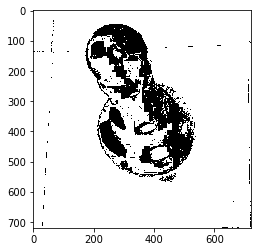

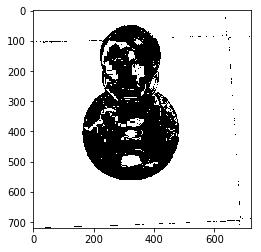

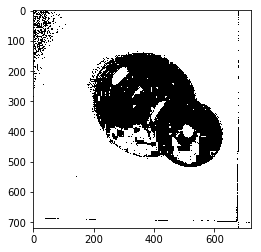

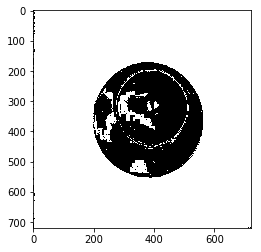

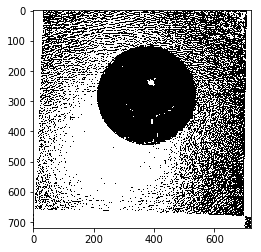

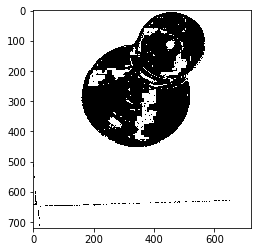

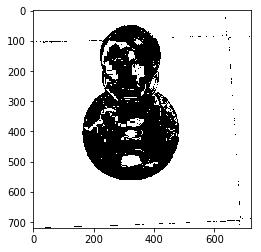

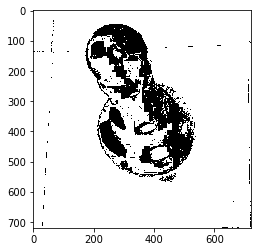

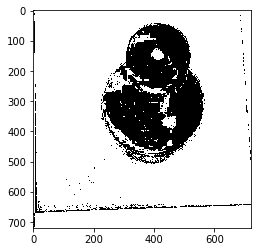

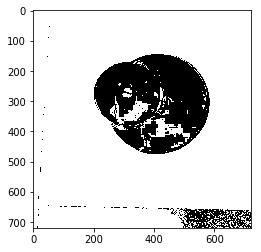

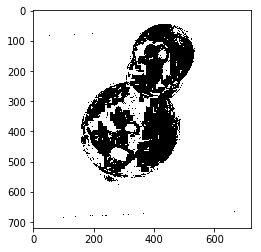

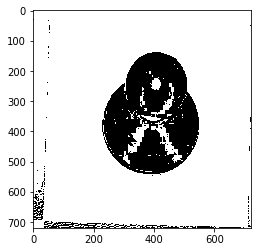

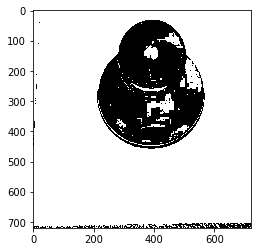

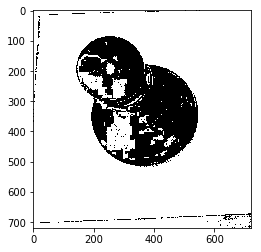

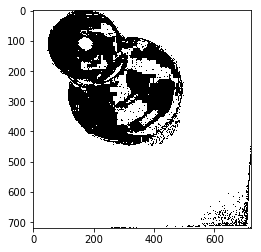

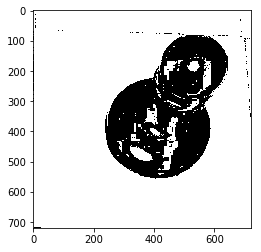

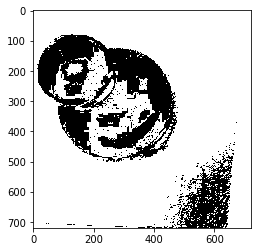

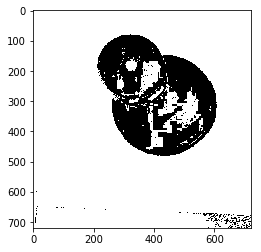

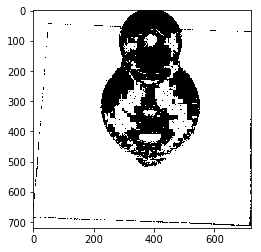

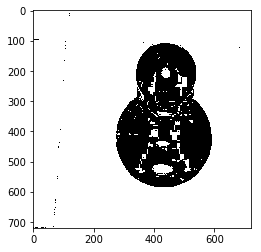

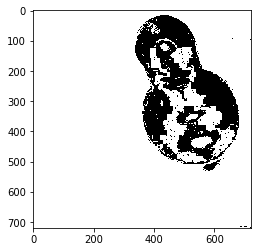

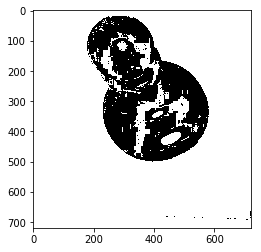

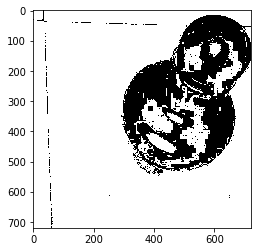

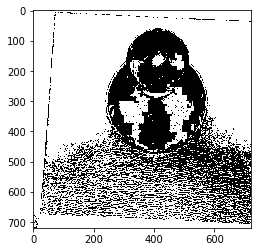

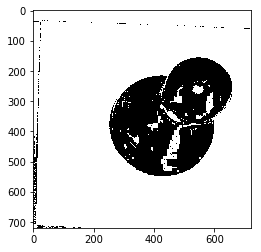

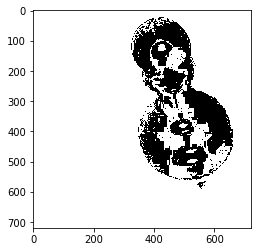

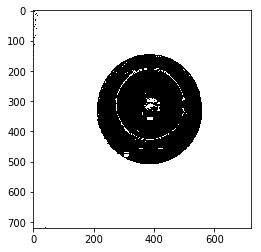

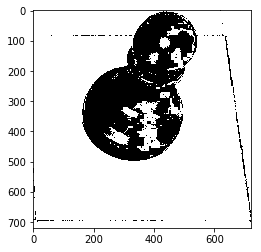

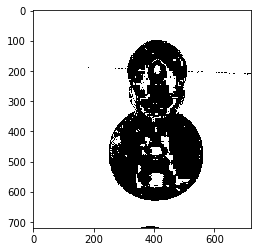

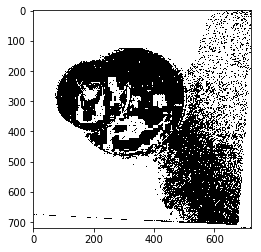

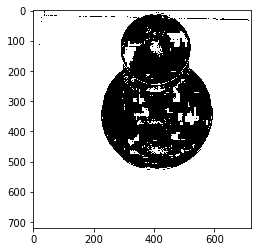

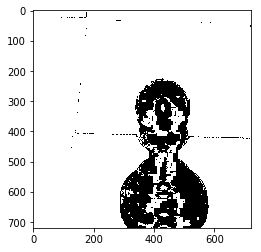

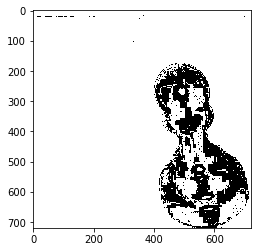

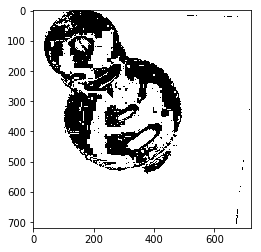

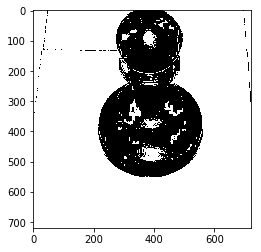

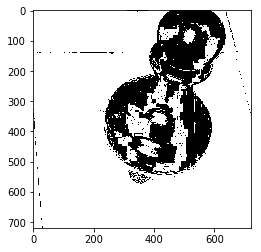

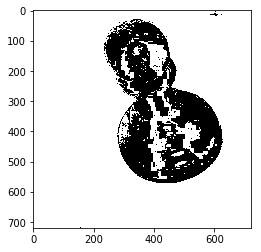

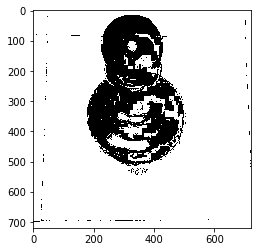

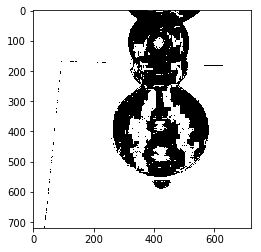

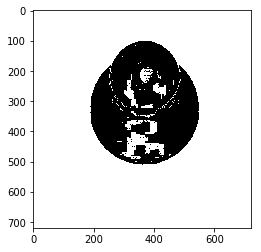

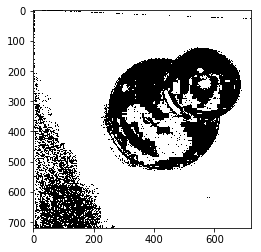

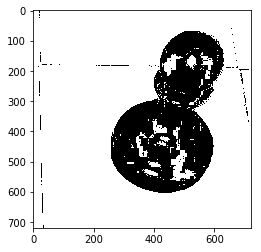

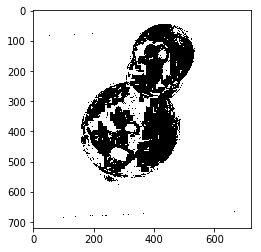

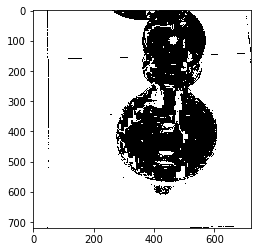

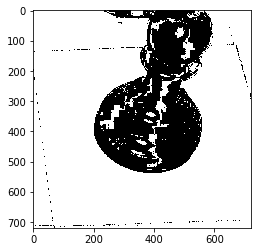

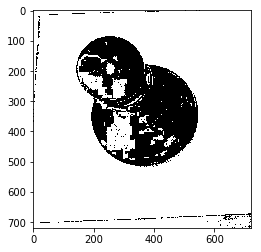

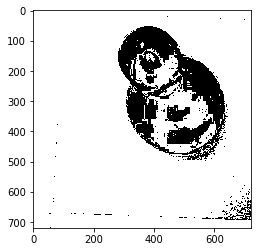

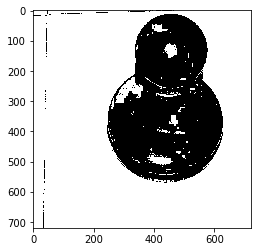

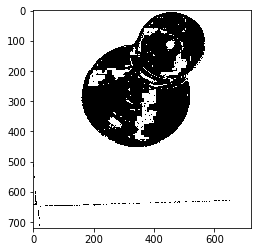

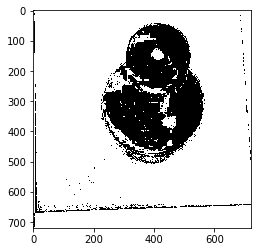

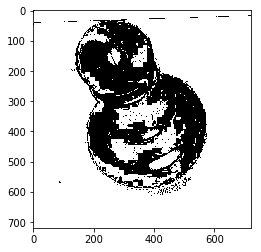

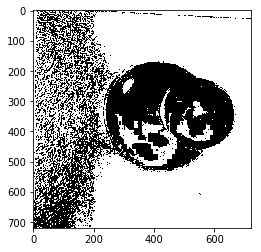

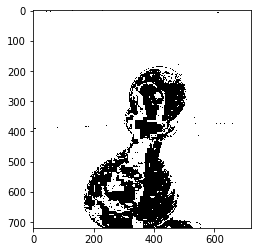

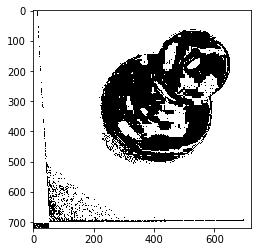

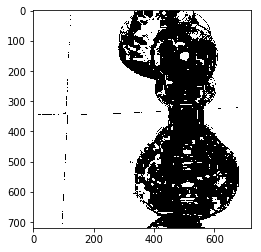

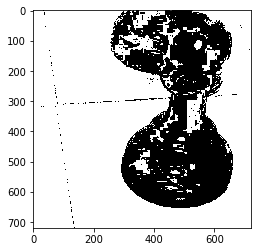

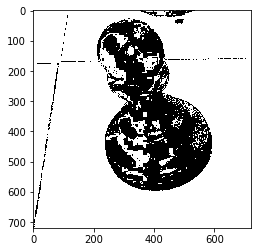

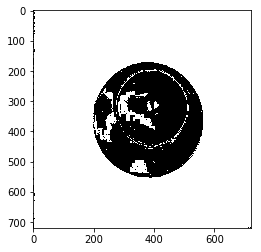

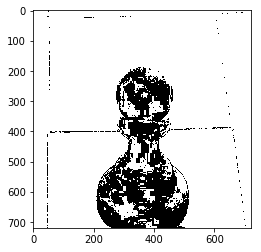

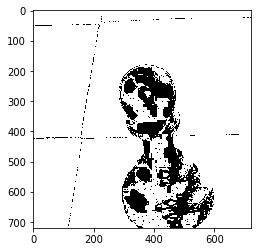

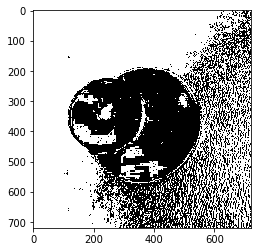

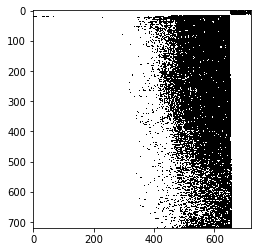

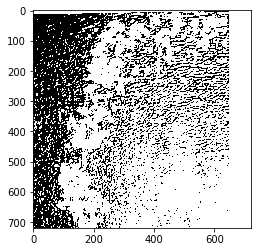

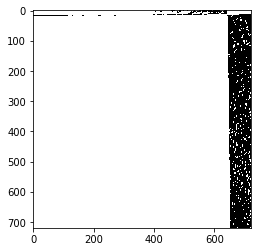

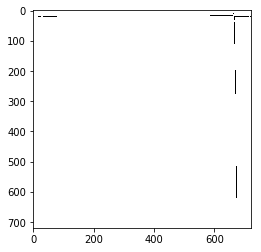

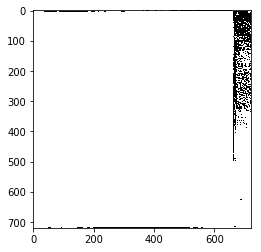

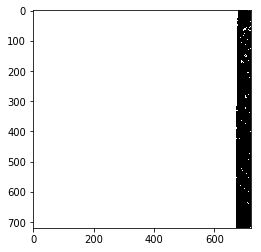

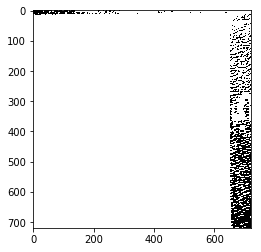

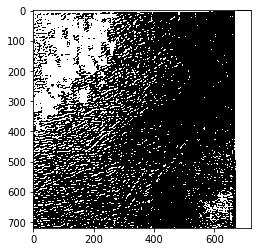

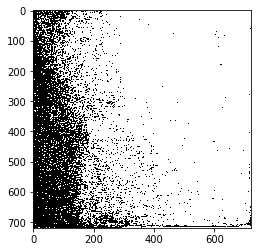

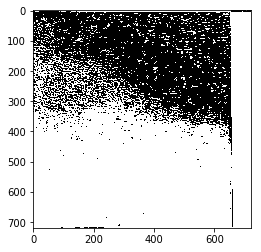

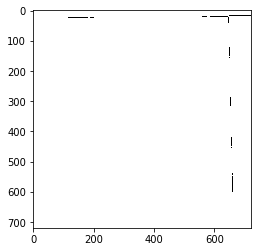

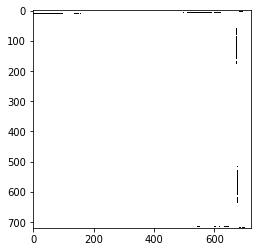

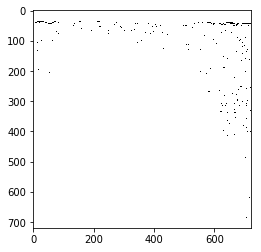

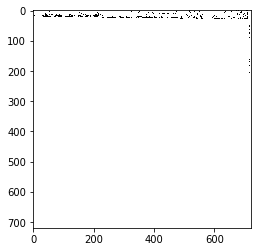

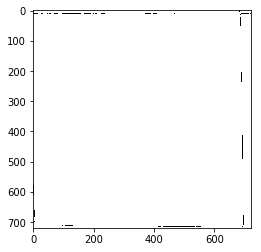

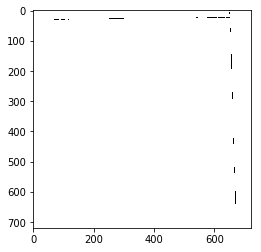

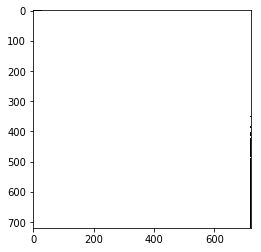

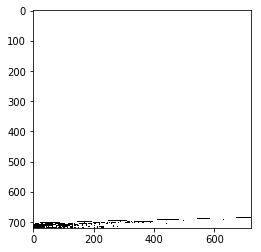

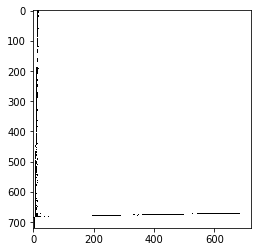

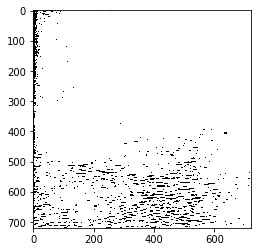

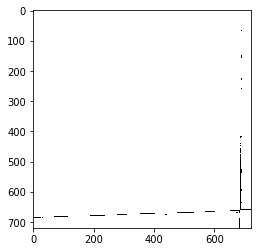

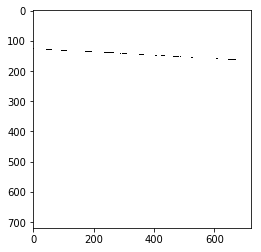

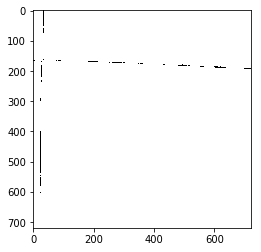

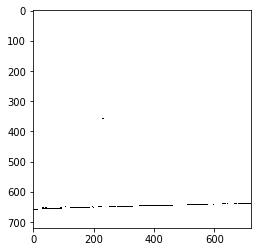

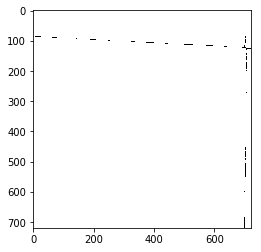

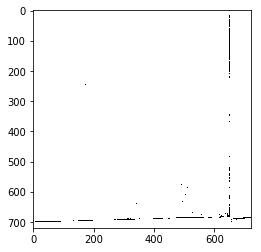

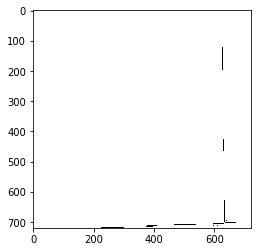

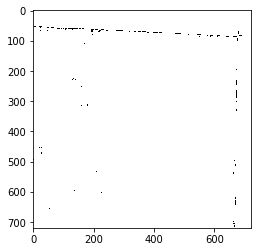

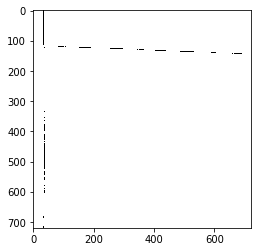

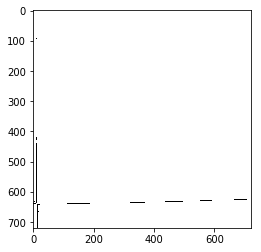

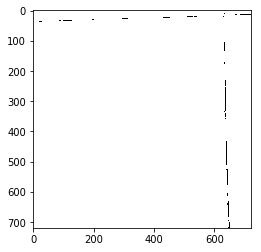

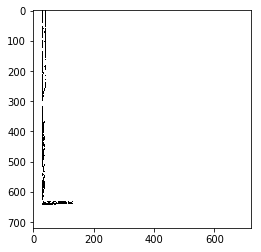

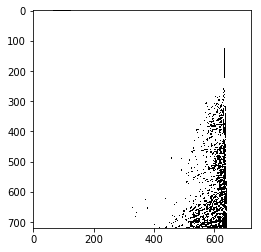

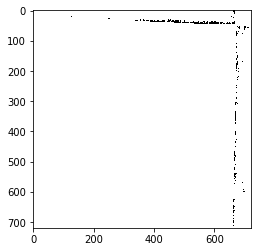

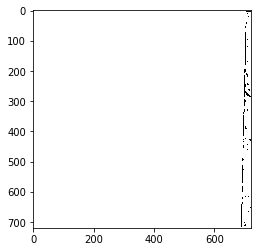

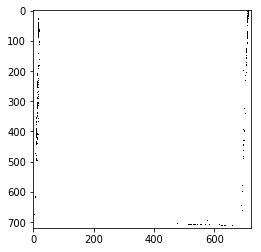

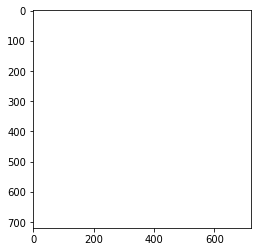

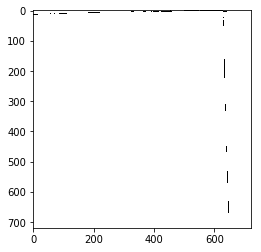

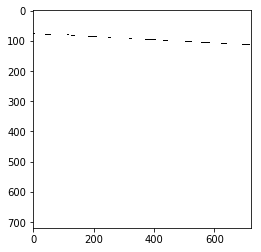

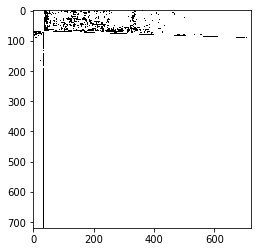

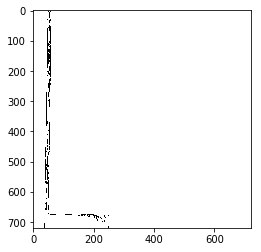

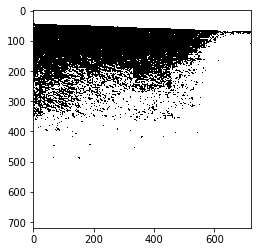

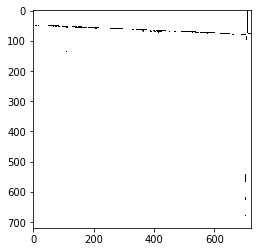

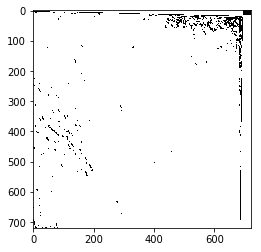

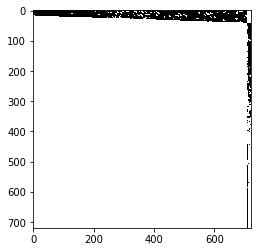

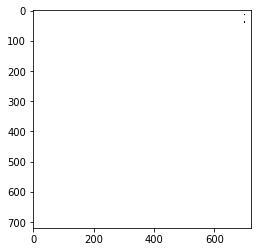

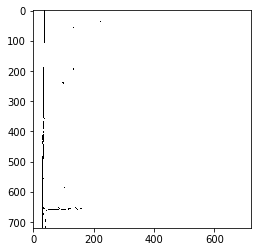

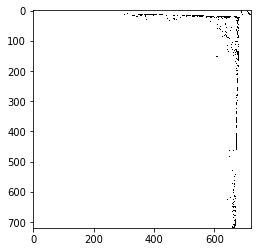

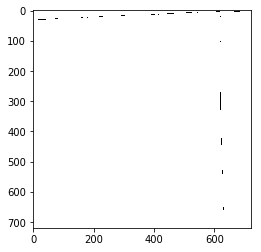

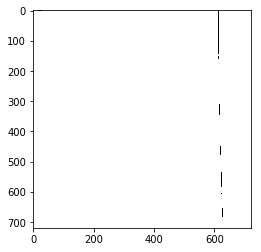

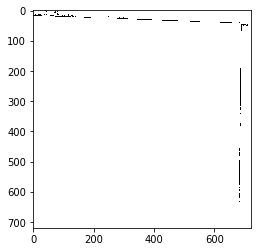

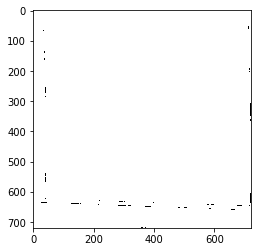

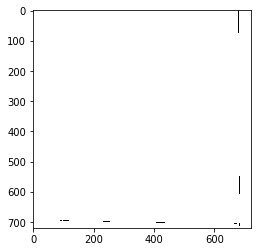

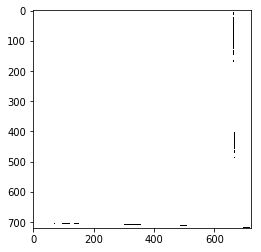

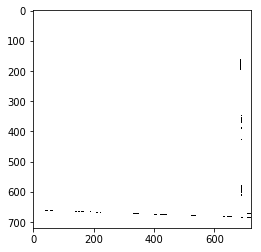

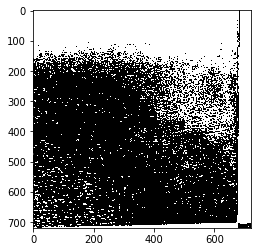

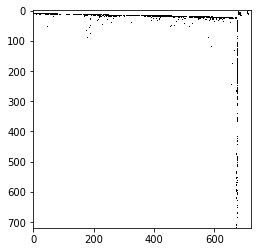

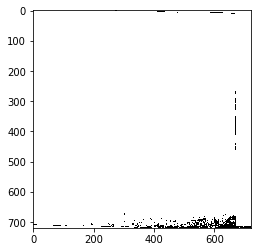

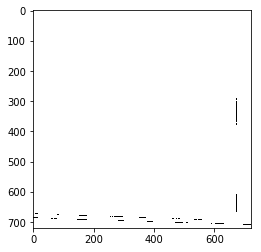

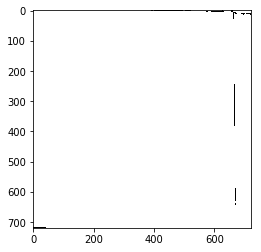

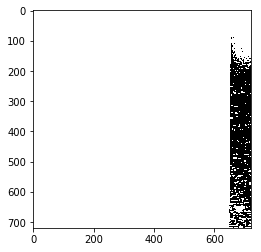

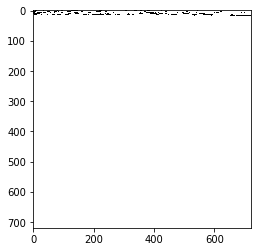

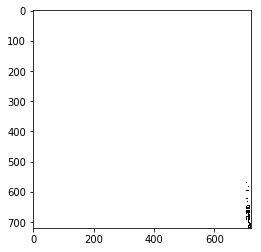

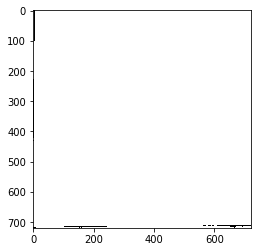

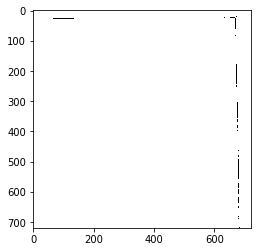

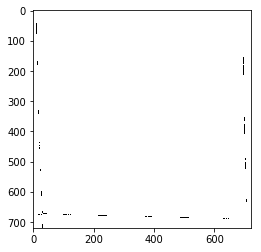

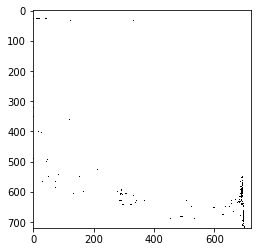

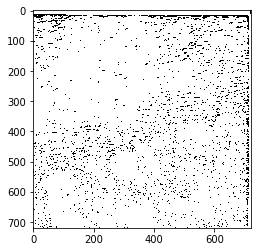

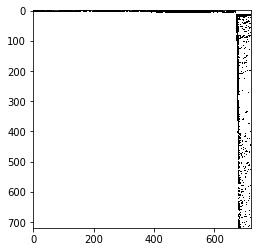

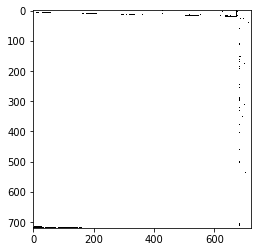

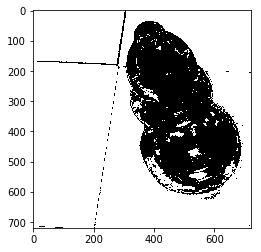

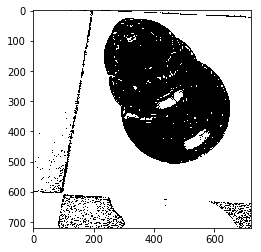

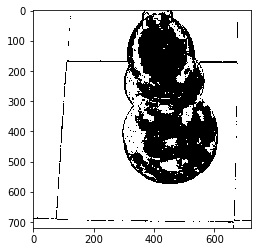

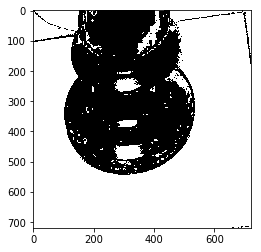

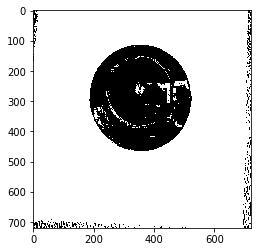

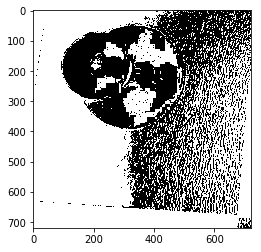

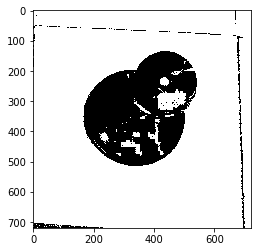

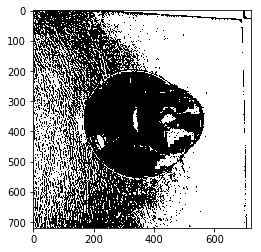

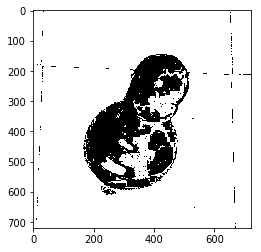

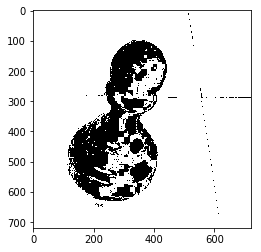

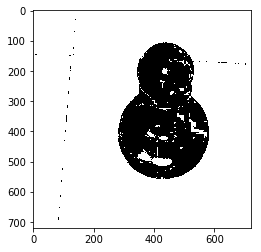

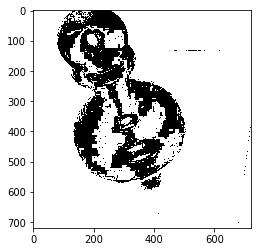

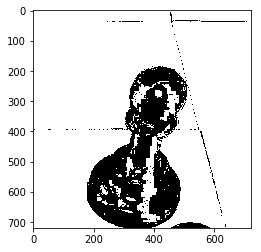

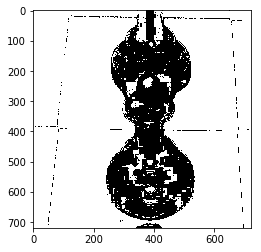

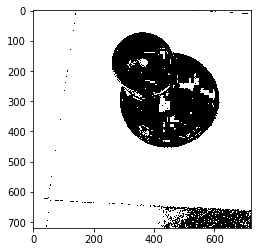

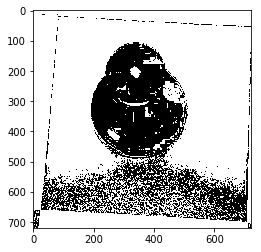

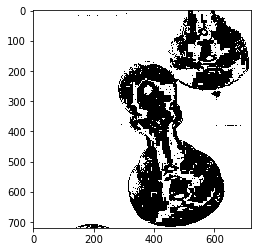

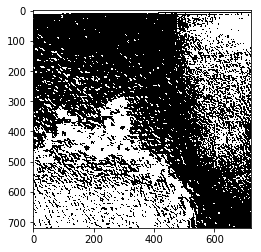

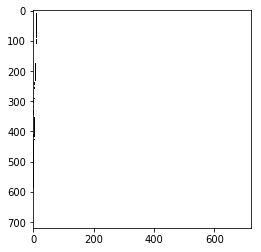

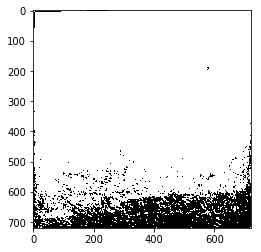

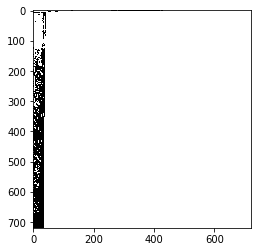

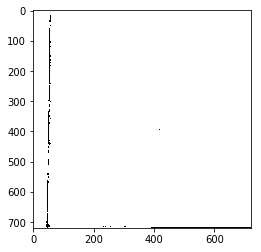

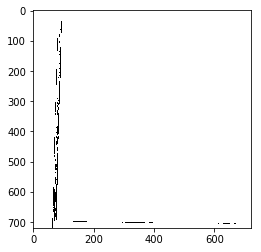

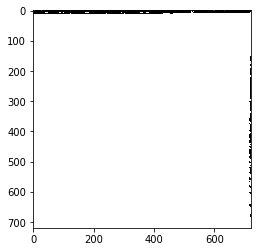

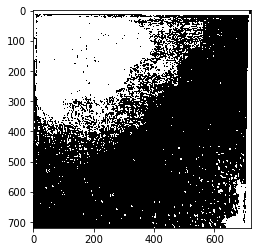

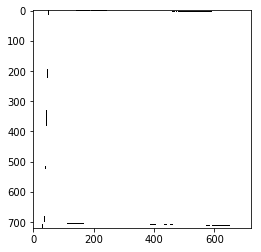

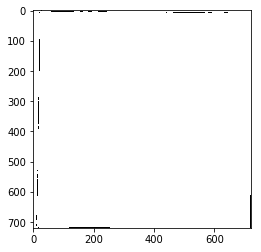

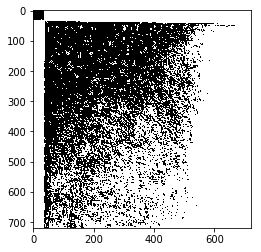

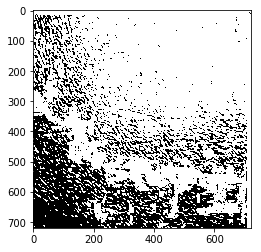

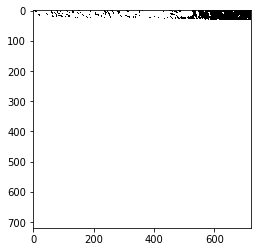

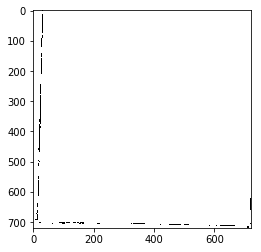

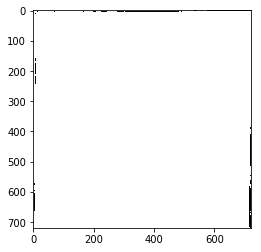

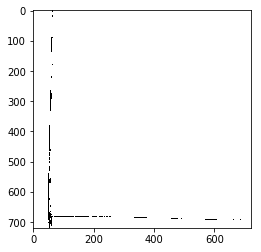

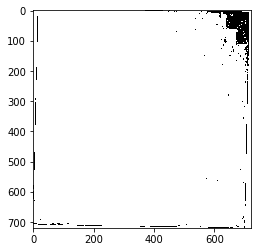

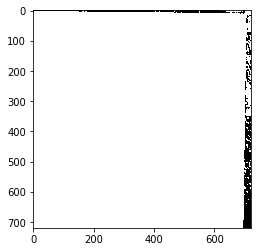

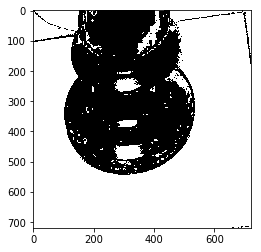

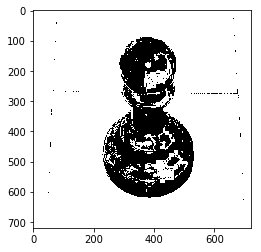

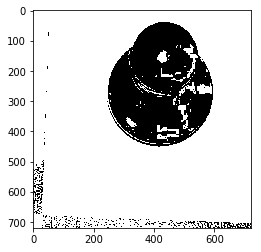

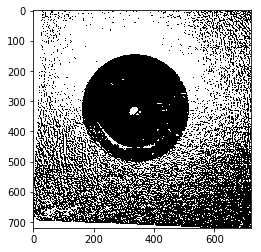

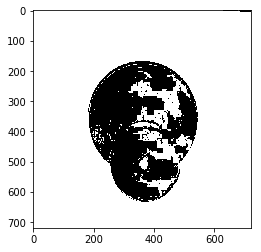

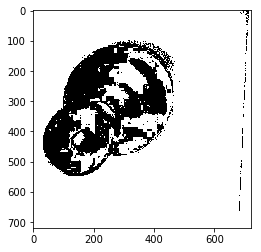

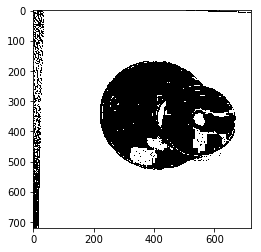

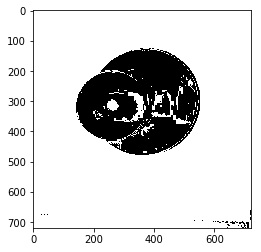

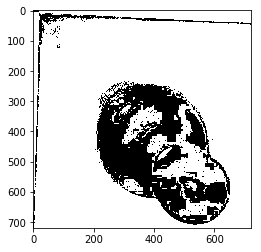

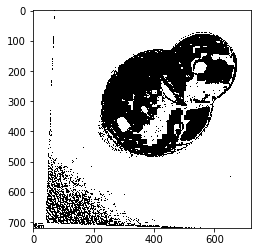

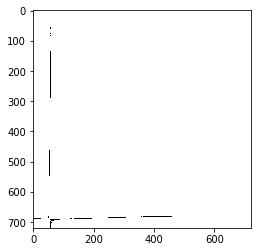

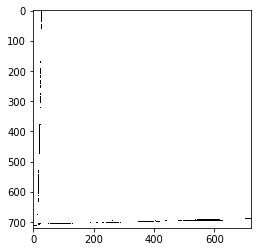

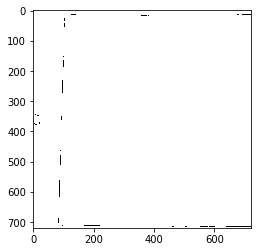

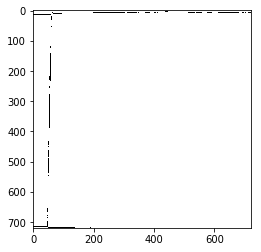

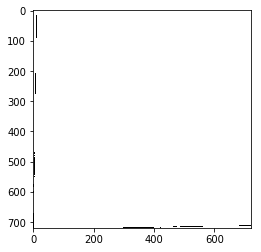

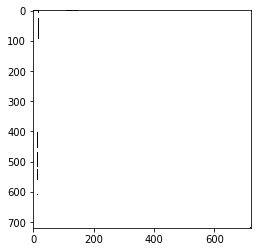

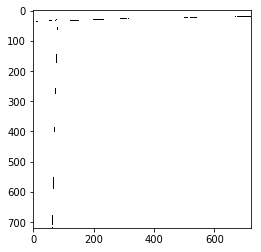

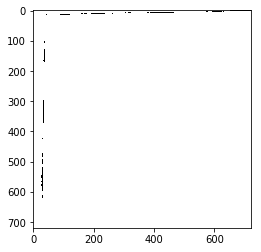

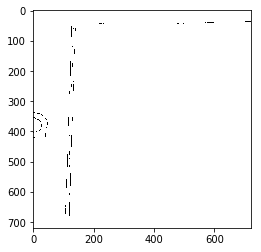

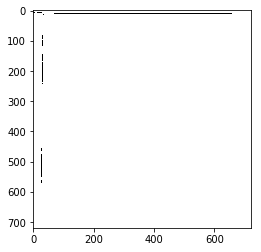

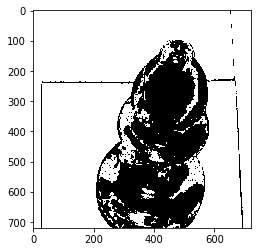

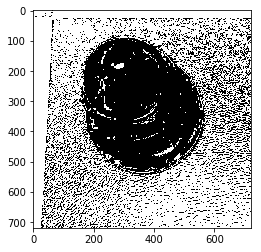

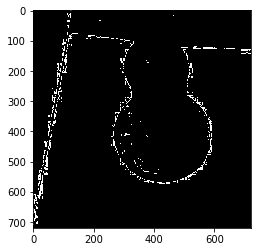

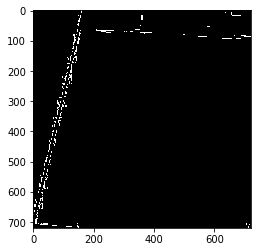

In [8]:
process_images(train_dir, black_pawn)
process_images(train_dir, empty)
process_images(train_dir, black_bishop)

process_images(test_dir, black_pawn)
process_images(test_dir, empty)
process_images(test_dir, black_bishop)

process_images(val_dir, black_pawn)
process_images(val_dir, empty)
process_images(val_dir, black_bishop)

process_images(test_image_dir, black_pawn)
process_images(test_image_dir, empty)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [12]:
datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
# current_test =. datagen.flow_from_directory(
#     current_test_dir,
#     target_size)

Found 141 images belonging to 3 classes.
Found 21 images belonging to 3 classes.
Found 32 images belonging to 3 classes.


In [14]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
6/6 [==============================] - 137s 23s/step - loss: 0.2903 - acc: 0.6548 - val_loss: 0.2609 - val_acc: 0.6667
Epoch 2/3
6/6 [==============================] - 117s 20s/step - loss: 0.2445 - acc: 0.6619 - val_loss: 0.2376 - val_acc: 0.6667
Epoch 3/3
6/6 [==============================] - 854s 142s/step - loss: 0.2339 - acc: 0.6667 - val_loss: 0.2308 - val_acc: 0.6667


In [16]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Вероятность распознавания на тестовых данных: %.2f%%" % (scores[1]*100))

Вероятность распознавания на тестовых данных: 66.67%


In [17]:
#omg

In [18]:
test_image = datagen.flow_from_directory(
    test_image_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
# pred = model.predict(final_image)
# pred_class = model.predict_classes(final_image)

Found 3 images belonging to 3 classes.


In [23]:
model.predict_proba(test_image, verbose=1)

1/1 [==============================] - 0s 360ms/step


array([[0.3297175 ],
       [0.42989868],
       [0.26175937]], dtype=float32)